## Multiple synthetic seismic models with oblique fault

An extension of [Multiple synthetic seismic models with vertical fault](https://github.com/mycarta/faults/blob/master/Multiple_synthetic_seismic_models_with_fault.ipynb), which was based on [Agile Scientific](https://agilescientific.com/)'s [x lines of code, Wedge model](https://github.com/agile-geoscience/xlines/blob/master/notebooks/00_Synthetic_wedge_model.ipynb) and adapt it to make 100 synthetic models: 10 impedance models x 10 wavelets x 10 random noise fields + 1 fault. **N.B. code is optimized for Python 3.7.1**

#### preliminaries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.ndimage as snd
import copy
import bruges

#### make an initial layered model

In [2]:
model = np.zeros((50,49), dtype=np.int) 
model[8:16,:]=1
model[16:24,:]=2
model[24:32,:]=3
model[32:40,:]=4
model[40:,:]=5

(50, 49)


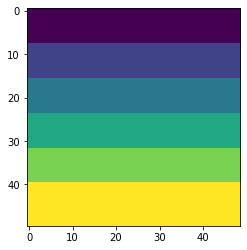

In [3]:
plt.imshow(model, cmap='viridis', aspect=1);
print (np.shape(model))

#### make some Vp-rho pairs (rock 0, rock 1, ... , rock5)

In [4]:
rocks = np.array([[2700, 2750],  # Vp, rho
                  [2400, 2450],
                  [2600, 2650], 
                  [2400, 2450],
                  [2800, 3000], 
                  [3100, 3200],])

#### create 10 slightly different variations of the Vp-rho pairs in the next tow cells

In [5]:
r = np.random.RandomState(1234)
rnd = r.rand(10,6,2)*0.2
print (np.shape(rnd))


(10, 6, 2)


In [6]:
mrocks = np.array([rocks + rocks*rn for rn in rnd], dtype=np.int)
manyrocks = np.rollaxis(mrocks,1,0)
print (np.shape(manyrocks))

(6, 10, 2)


####  create 10 earth models by combining Vp-rho pairs with the layered model, dispaly a pair

In [7]:
earth = manyrocks[model]
earth = np.rollaxis(earth,2,0)
print (np.shape(earth))

(10, 50, 49, 2)


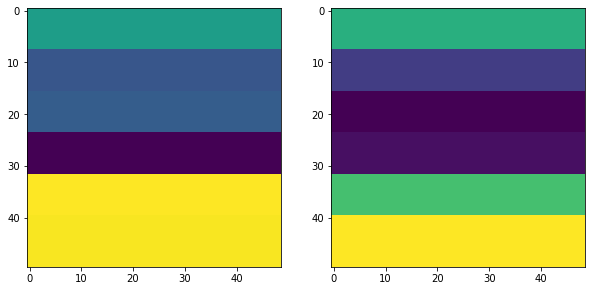

In [8]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.imshow(earth[3,:,:,0],cmap='viridis', aspect=1)
ax2.imshow(earth[3,:,:,1],cmap='viridis', aspect=1);

#### create 10 impedance models from the above earht models by multiplying Vp and Rho (last axis), display a few

In [9]:
impedances = [np.apply_along_axis(np.product, -1, e).astype(float) for e in earth]# Python 2
print (np.shape(impedances))

(10, 50, 49)


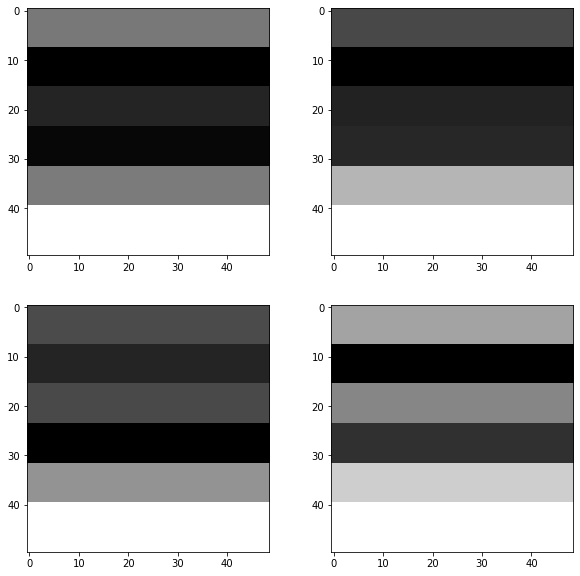

In [10]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.imshow(impedances[2],cmap='gray', aspect=1)
ax2.imshow(impedances[4],cmap='gray', aspect=1)
ax3.imshow(impedances[6],cmap='gray', aspect=1)
ax4.imshow(impedances[8],cmap='gray', aspect=1);

#### Insert an oblique fault in one of the impedance models

In [11]:
unshifted = impedances[8]
up = sp.ndimage.interpolation.shift(unshifted, (5,0), cval=unshifted[0,0]*0.9)
down = sp.ndimage.interpolation.shift(unshifted, (-5,0), cval=unshifted[0,-1]*0.8) 

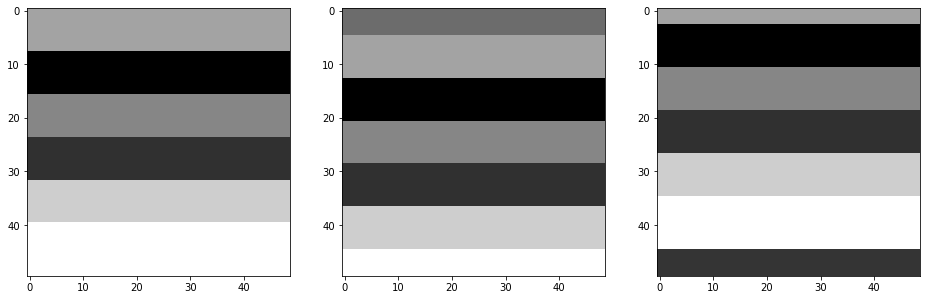

In [12]:
plt.figure(figsize=(16, 10))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.imshow(unshifted, cmap='gray', vmin = np.amin(unshifted), vmax = np.amax(unshifted), aspect=1)
ax2.imshow(up, cmap='gray', vmin = np.amin(unshifted), vmax = np.amax(unshifted), aspect=1)
ax3.imshow(down, cmap='gray', vmin = np.amin(unshifted), vmax = np.amax(unshifted), aspect=1)

plt.show()

In [13]:
normal = copy.deepcopy(unshifted)
reverse = copy.deepcopy(unshifted)

normal[np.triu_indices(49)] = up[np.triu_indices(49)]
reverse[np.triu_indices(49)] = down[np.triu_indices(49)]


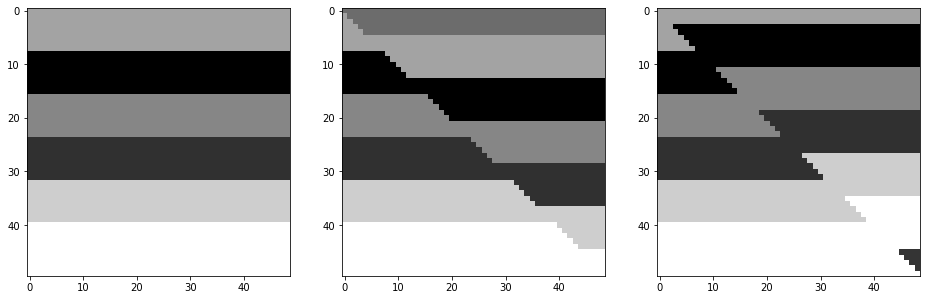

In [14]:
fig = plt.figure(figsize=(16, 10))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)


ax1.imshow(unshifted, cmap='gray', vmin = np.amin(unshifted), vmax = np.amax(unshifted), aspect=1, interpolation = 'none')
ax2.imshow(normal, cmap='gray', vmin = np.amin(unshifted), vmax = np.amax(unshifted), aspect=1, interpolation = 'none')
ax3.imshow(reverse,cmap='gray', vmin = np.amin(unshifted), vmax = np.amax(unshifted), aspect=1, interpolation = 'none')
plt.show()

fig.savefig('faults.png', dpi=200, bbox_inches='tight', pad_inches=0.4)

__Cool! Now have to just extend to all models, generate reflection coefficients, wavelets, and convolve!!!__